In [1]:
!python -V

Python 3.11.7


In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
#df 


STD and Distribution

42.5943442974141


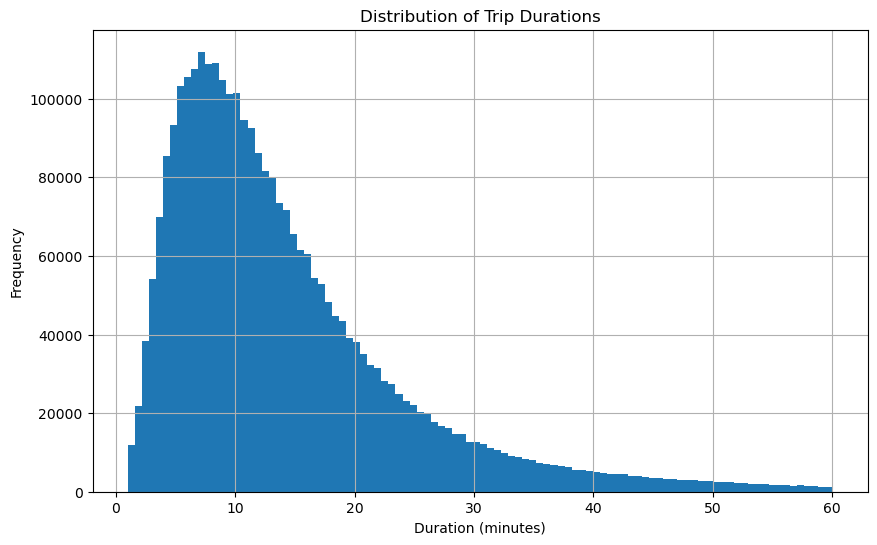

In [4]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
print(np.std(df.duration))
df = df[(df.duration >= 1) & (df.duration <= 60)]

# Step 1: Calculate and visualize the distribution of the 'duration' variable
plt.figure(figsize=(10, 6))
df['duration'].hist(bins=100)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

Remove outliers

Fraction of records remaining after filtering: 3009173 3009173


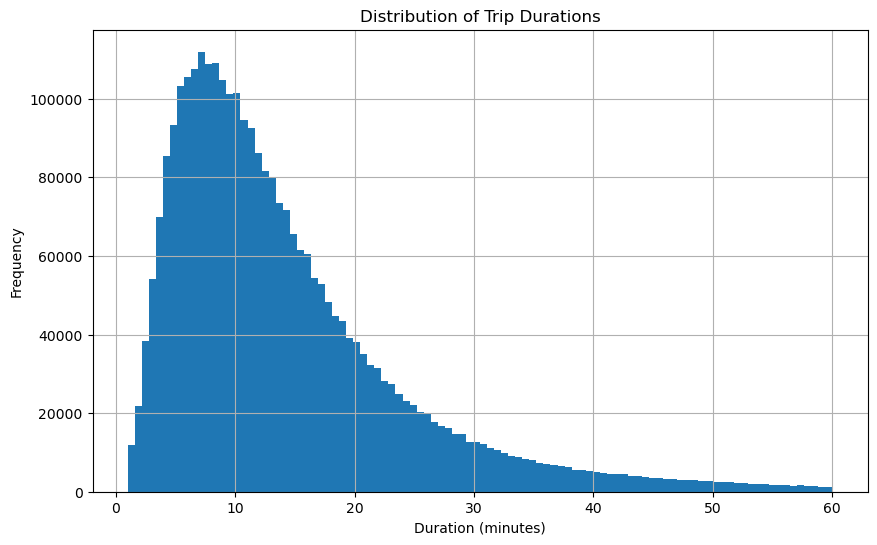

In [5]:
original_count = df.shape[0]
df
df = df[(df.duration >= 1) & (df.duration <= 60)]
df
filtered_count = df.shape[0]

# Calculate the fraction of records left after filtering
fraction_remaining = filtered_count / original_count

# Print the result

print(f"Fraction of records remaining after filtering: {original_count} {filtered_count}")

plt.figure(figsize=(10, 6))
df['duration'].hist(bins=100)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

In [6]:
categorical = ['PULocationID', 'DOLocationID']


df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
# print(X_train)
num_columns = X_train.shape[1]
print("Number of columns in the feature matrix:", num_columns)


Number of columns in the feature matrix: 515


Train model

In [7]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.6492622370693075

Validate model

In [8]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [9]:
df_train = read_dataframe('./data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('./data/yellow_tripdata_2023-02.parquet')

In [10]:
len(df_train), len(df_val)

(3009173, 2855951)

In [11]:
#df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
#df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [12]:
#categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [13]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.811813068335911